In [1]:
from math import dist
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

In [2]:
x1 = [0.09 , 0.16 , 0.84 , 0.70]
y1 = [0.17,   0.52,  0.92, 0.16]

x2 = [16.47000,16.47000,20.09000,22.39000,25.23000,22,20.47000,17.20000,16.30000,14.05000,16.53000,21.52000,19.41000,20.09000]
y2 = [96.10000,94.44000,92.54000,93.37000,97.24000,96.05000,97.02000,96.29000,97.38000,98.12000,97.38000,95.59000,97.13000,94.55000]

x3 = [7,9,2,0,0,1,7,1,2,51,42,31,5,12,36,52,27,17,13,57,62,42,16,8,7,27,30,43,58,58,37,38,46,61,62,63,32,45,59,5,10,21,5,30,39,32,25,25,48,56]
y3 = [52,49,64,26,30,47,63,62,33,21,41,32,25,42,16,41,23,33,13,58,42,57,57,52,38,68,48,67,48,27,69,46,10,33,63,69,22,35,15,6,17,10,64,15,10,39,32,55,28,37]

x4 = [1380,2848,3510,457,3888,984,2721,1286,2716,738,1251,2728,3815,3683,1247,123,1234,252,611,2576,928,53,1807,274,2574,178,2678,1795,3384,3520,1256,1424,3913,3085,2573,463,3875,298,3479,2542,3955,1323,3447,2936,1621,3373,1393,3874,938,3022,2482,3854,376,2519,2945,953,2628,2097,890,2139,2421,2290,1115,2588,327,241,1917,2991,2573,19,3911,872,2863,929,839,3893,2178,3822,378,1178,2599,3416,2961,611,3113,2597,2586,161,1429,742,1625,1187,1787,22,3640,3756,776,1724,198,3950]
y4 = [939,96,1671,334,666,965,1482,525,1432,1325,1832,1698,169,1533,1945,862,1946,1240,673,1676,1700,857,1711,1420,946,24,1825,962,1498,1079,61,1728,192,1528,1969,1670,598,1513,821,236,1743,280,1830,337,1830,1646,1368,1318,955,474,1183,923,825,135,1622,268,1479,981,1846,1806,1007,1810,1052,302,265,341,687,792,599,674,1673,1559,558,1766,620,102,1619,899,1048,100,901,143,1605,1384,885,1830,1286,906,134,1025,1651,706,1009,987,43,882,392,1642,1810,1558]

In [3]:
n = len(x4)
x = np.array(x4, dtype=float)
y = np.array(y4, dtype=float)
edges = np.zeros(shape=(n,n), dtype=float)

for i in range(n):
    for j in range(n):
        edges[i,j] = dist([x[i], y[i]], [x[j], y[j]])

In [4]:
"""Simple travelling salesman problem between cities."""

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = edges
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data


def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {} miles'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    # plan_output = 'Route for vehicle 0:\n'
    # route_distance = 0
    lst = []
    while not routing.IsEnd(index):
        # plan_output += ' {} ->'.format(manager.IndexToNode(index))
        lst.append(manager.IndexToNode(index))
        # previous_index = index
        index = solution.Value(routing.NextVar(index))
        # route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    print(lst)
    return lst
    # plan_output += ' {}\n'.format(manager.IndexToNode(index))
    # print(plan_output)
    # plan_output += 'Route distance: {}miles\n'.format(route_distance)

In [5]:
# Instantiate the data problem.
data = create_data_model()

# Create the routing index manager.
manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                        data['num_vehicles'], data['depot'])

# Create Routing Model.
routing = pywrapcp.RoutingModel(manager)


def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)

# Define cost of each arc.
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Setting first solution heuristic.
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
# search_parameters.first_solution_strategy = (
#     routing_enums_pb2.FirstSolutionStrategy.AUTOMATIC)

# https://developers.google.com/optimization/routing/routing_options#local_search_options
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH)
search_parameters.time_limit.seconds = 30
search_parameters.log_search = True

# Solve the problem.
solution = routing.SolveWithParameters(search_parameters)

# Print solution on console.
lst = print_solution(manager, routing, solution)

Objective: 21247 miles
[0, 62, 5, 48, 89, 18, 74, 91, 7, 41, 88, 30, 79, 55, 96, 3, 64, 25, 65, 69, 21, 93, 15, 87, 52, 78, 17, 23, 37, 98, 35, 83, 9, 71, 20, 73, 58, 16, 14, 10, 31, 44, 90, 97, 22, 76, 59, 61, 34, 85, 26, 11, 19, 56, 8, 6, 54, 82, 33, 28, 45, 42, 2, 13, 70, 40, 99, 47, 29, 38, 95, 77, 51, 4, 36, 32, 75, 12, 94, 81, 84, 67, 72, 49, 43, 1, 53, 39, 63, 68, 80, 24, 86, 50, 60, 57, 66, 27, 92, 46]


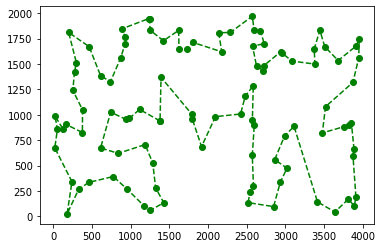

In [6]:
plot_x = []
plot_y = []
for i in lst:
    plot_x.append(x[i])
    plot_y.append(y[i])
plot_x.append(x[lst[0]])
plot_y.append(y[lst[0]])

plt.plot(plot_x, plot_y, marker='o', color='green', linestyle='dashed')